In [5]:
import os
import sys
import re
import numpy as np
from numpy.ma import masked_array
import matplotlib.pyplot as plt

from osgeo import gdal
from osgeo import gdalconst
from osgeo.gdalconst import *

driver = gdal.GetDriverByName("GTiff")
driver.Register()

2

In [10]:
ruta = '/home/dramon/Analysis/percepcion_remota/AP-LIAPRE/img_modis'
patron = "^(MOD|mod).*\d+$"
directorios1n = list(filter(lambda x: re.match(patron, x) is not None, os.listdir(ruta)))

# estoy definiendo ruta a imagen

In [ ]:
PathImag = os.path.join(ruta, directorios1n[0])

# Cargando la imagen con herramienta GDal

In [ ]:
imag = gdal.Open(PathImag, GA_ReadOnly)

In [20]:
print(imag.RasterXSize, imag.RasterYSize)

691 593


In [21]:
print(imag.RasterCount)

1


In [22]:
imag.GetMetadata()

{'Band_1': 'Band Math (b31-b32)'}

In [24]:
imag.ReadAsArray().dtype

dtype('float32')

In [33]:
def grafica(array):
    plt.figure(figsize=(15, 15))
    plt.imshow(array, cmap=plt.cm.gray)
    plt.colorbar()

In [31]:
nbands = imag.RasterCount
print(nbands)

1


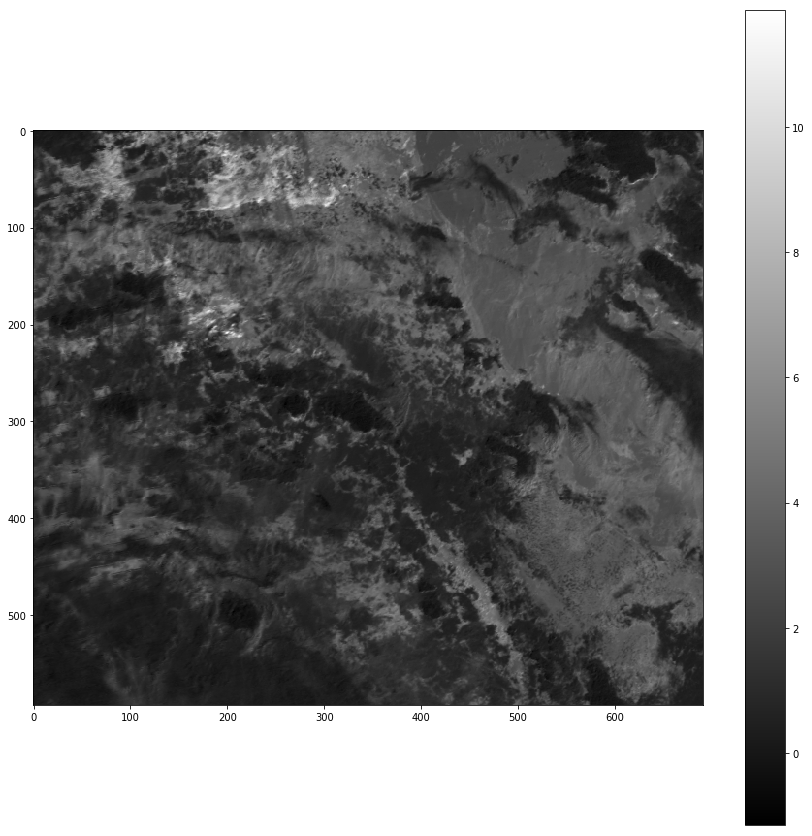

In [36]:
for i in range(nbands):
    band = imag.GetRasterBand(i + 1)
    grafica(band.ReadAsArray())

In [67]:
pathImag2 = "/home/dramon/Analysis/percepcion_remota/percepcionremota/clustering/DATA/Huamantla/ht_14_07_2018_intensities.tif"
imag = gdal.Open(pathImag2, GA_ReadOnly)

In [68]:
imag.RasterCount

4

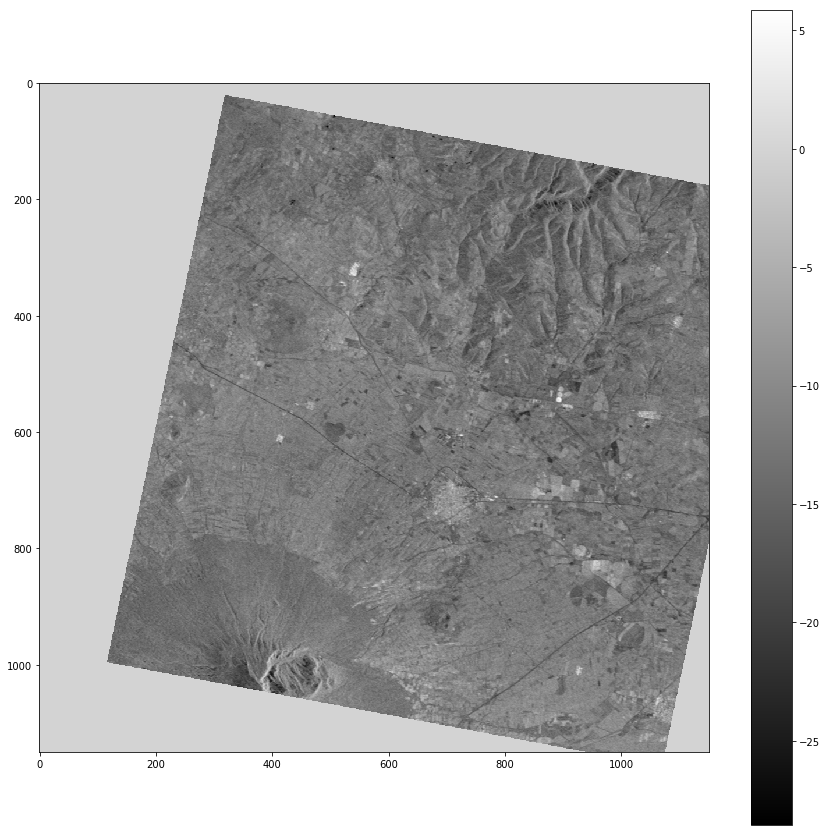

In [85]:
plt.figure(figsize=(15,15))
plt.imshow(imag.GetRasterBand(1).ReadAsArray(), cmap=plt.cm.gray)
plt.colorbar()

In [72]:
uno = np.histogram(imag.GetRasterBand(1).ReadAsArray().ravel())

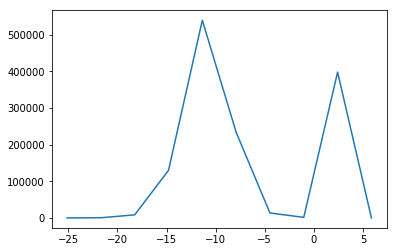

In [73]:
plt.plot(uno[1][1:], uno[0])

(0, 150000)

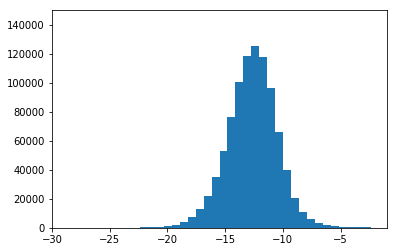

In [84]:
_ = plt.hist(imag.GetRasterBand(1).ReadAsArray().ravel(), bins=50)
plt.xlim(-30, -1)
plt.ylim(0, 150000)

In [86]:
bandArray = imag.GetRasterBand(1).ReadAsArray()
mask = bandArray > 0

In [91]:
from numpy.ma import masked_array

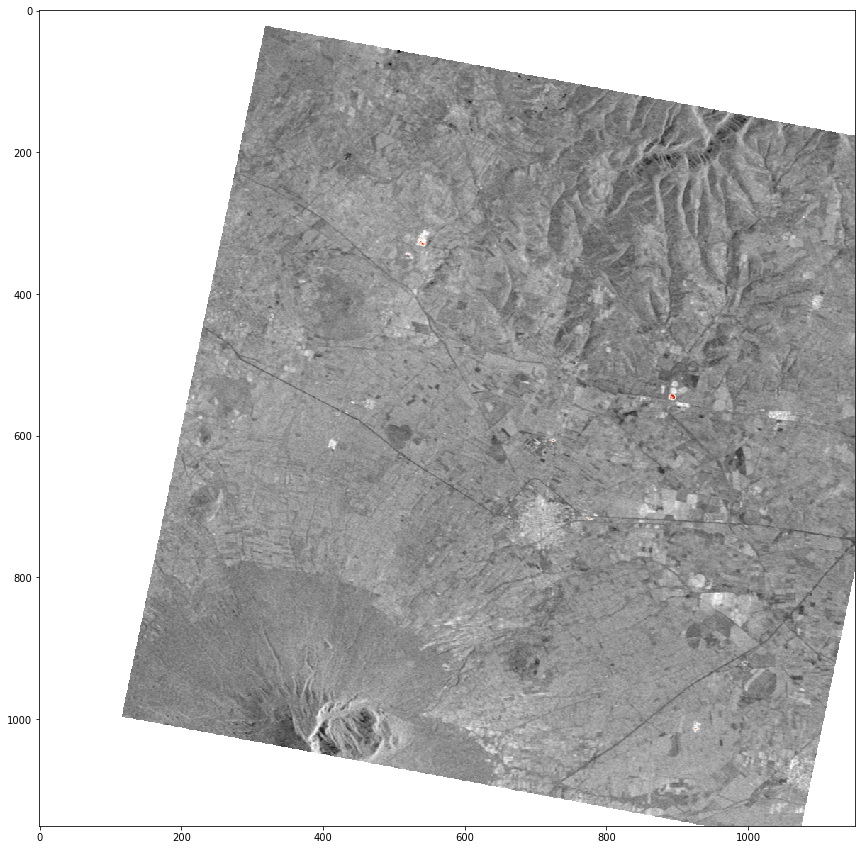

In [92]:
va = masked_array(bandArray, mask)
vb = masked_array(bandArray, np.logical_not(mask))
plt.figure(figsize=(15, 15))
plt.imshow(va, cmap='gray')
plt.imshow(vb, cmap='Reds')

(-25, -2)

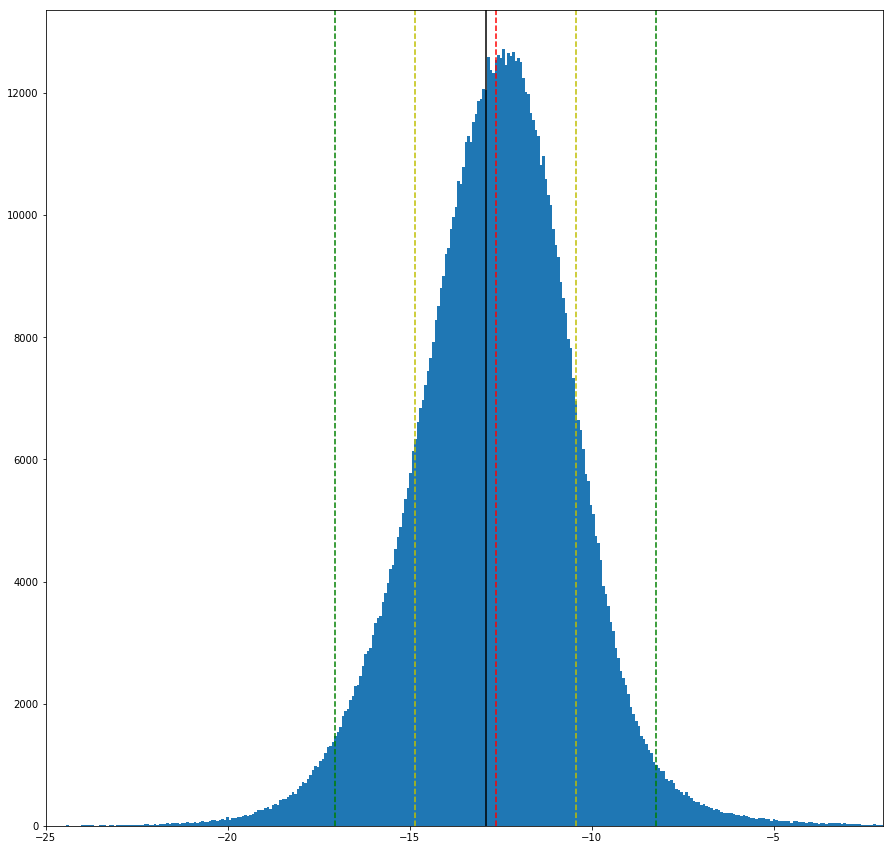

In [123]:
filtrado = np.array(list(filter(lambda x: x != 0., bandArray.ravel())))
plt.figure(figsize=(15,15))
_ = plt.hist(filtrado, bins=500)
media = filtrado.mean()
stdev = filtrado.std()
plt.axvline(media, color='r', linestyle='--')
# 66 %
plt.axvline(media - stdev, color='y', linestyle='--')
plt.axvline(media + stdev, color='y', linestyle='--')
# 99 %
plt.axvline(media - (2 * stdev), color='g', linestyle='--')
plt.axvline(media + (2 * stdev), color='g', linestyle='--')
# quantiles
quantiles = np.quantile(filtrado, [0.9, 0.75, 0.25, 0.1])
totsu = threshold_otsu(filtrado)
plt.axvline(totsu, color='k')
# plt.vlines(quantiles, ymin=0, ymax=130000, color='pink', linestyle='--')
plt.xlim(-25,-2)

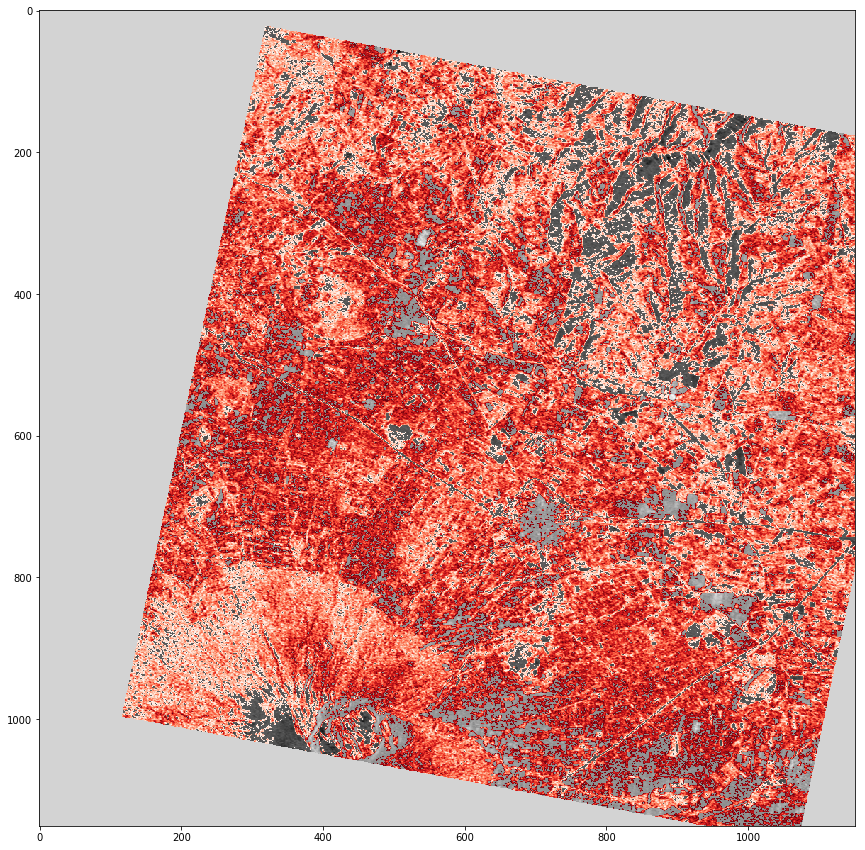

In [117]:
mask = bandArray > quantiles[-1]
mask2 = bandArray < quantiles[0]
smask = np.logical_and(mask, mask2)
va = masked_array(bandArray, smask)
vb = masked_array(bandArray, np.logical_not(smask))
plt.figure(figsize=(15, 15))
plt.imshow(va, cmap='gray')
plt.imshow(vb, cmap='Reds')

In [121]:
from skimage.filters import threshold_otsu

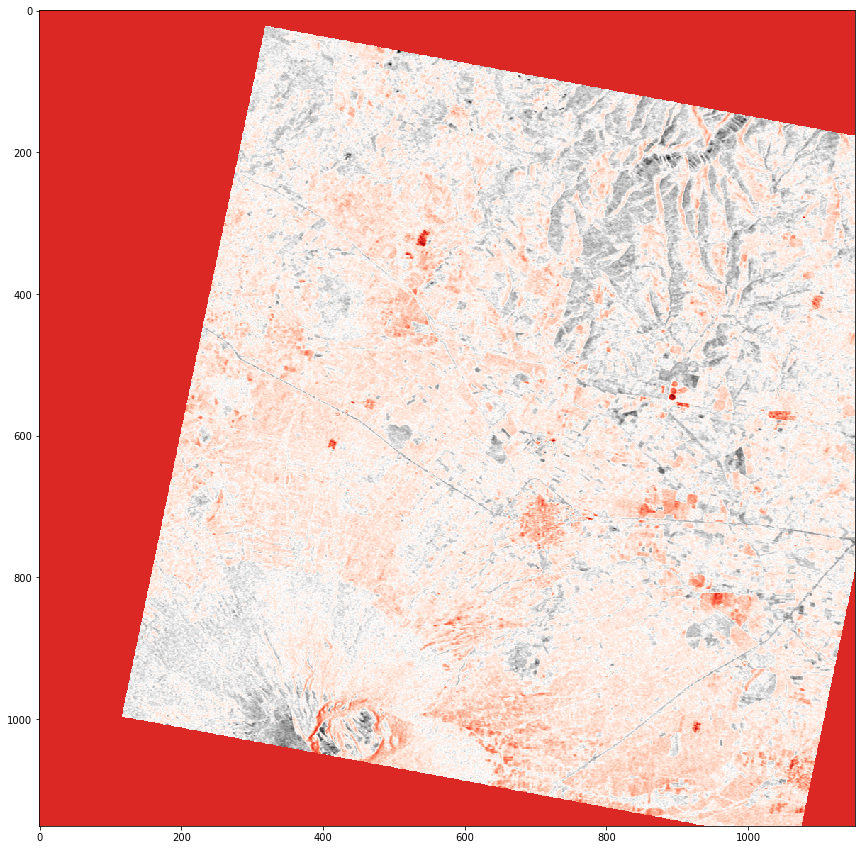

In [122]:
mask = bandArray > threshold_otsu(filtrado)
va = masked_array(bandArray, mask)
vb = masked_array(bandArray, np.logical_not(mask))
plt.figure(figsize=(15, 15))
plt.imshow(va, cmap='gray')
plt.imshow(vb, cmap='Reds')

In [124]:
from skimage import exposure

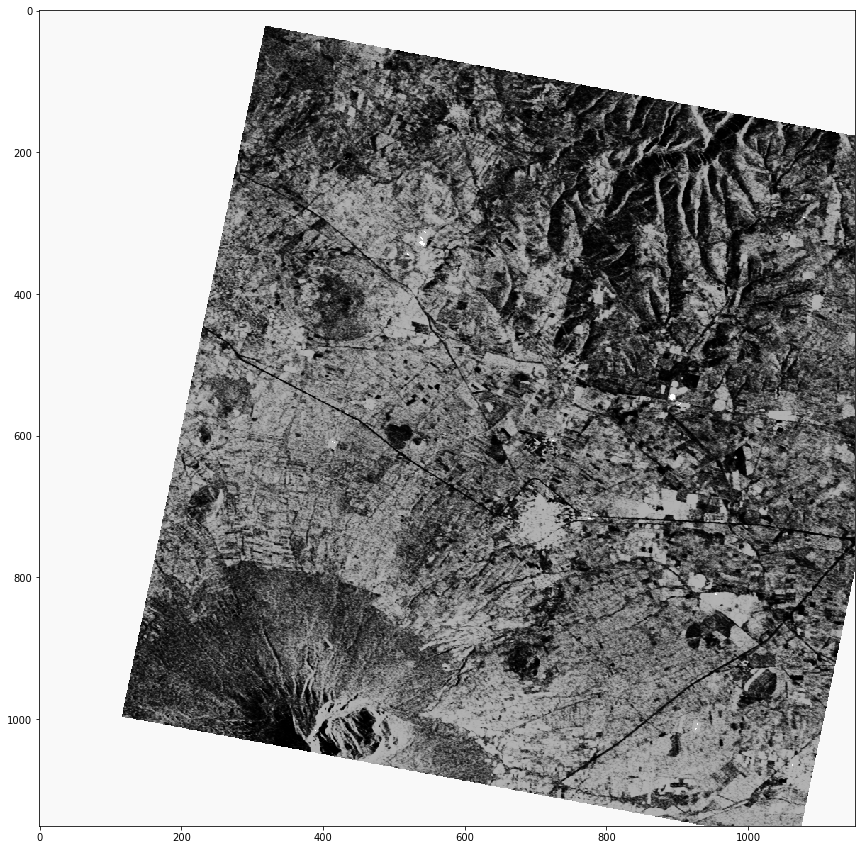

In [126]:
img_eq = exposure.equalize_hist(bandArray)
plt.figure(figsize=(15, 15))
plt.imshow(img_eq, cmap=plt.cm.gray)

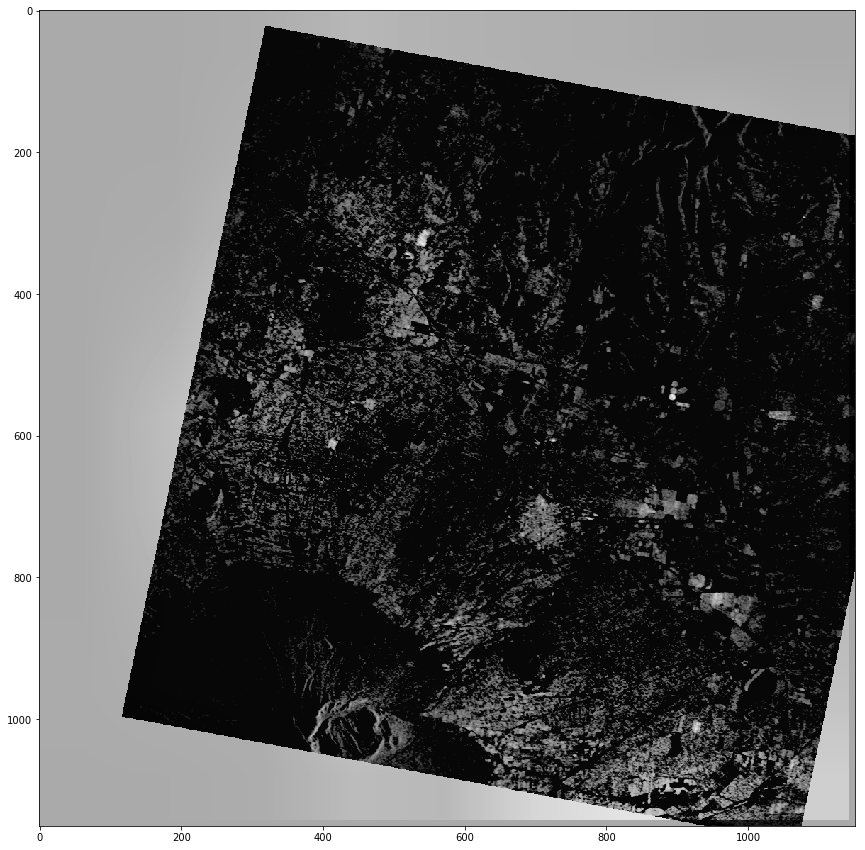

In [139]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(normalizado2, clip_limit=0.03)
plt.figure(figsize=(15, 15))
plt.imshow(img_adapteq, cmap=plt.cm.gray)

In [ ]:
normalizado = (bandArray - np.median(bandArray)) 
normalizado2 = normalizado / normalizado.max()

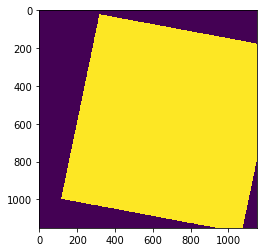

In [140]:
mask = bandArray != 0
plt.imshow(mask)